In [1]:
## Loading the Libraries
import pandas as pd
import numpy as np

# Loading the dataset
train = pd.read_csv('/home/aakash/Downloads/ml_iit_bhu/train.csv')
test =  pd.read_csv('/home/aakash/Downloads/ml_iit_bhu/test.csv')

In [2]:
## Exploring the datsets
print(train.shape); print(test.shape) # only 7 features
## So many data points

## Lets explore the variables
train.dtypes
len(train['Upvotes'].value_counts()) # Regression problem

(330045, 7)
(141448, 6)


7239

In [3]:
train.head(15) # So the author of qn with id 327662 has a very nice reputation and high no. of upvotes and the qn view is also large

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0
9,130054,c,2749.0,1.0,10189,227.0,0.0


In [4]:
# Checking the missing values
train.isnull().sum().sum() ## No missing values,COOL
test.isnull().sum().sum()

0

In [5]:
ID = test.ID
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [6]:
train = train.drop('ID' , axis = 1)
test = test.drop('ID' , axis = 1)

In [7]:
from scipy.stats import mode

df = train.groupby('Username').sum()[['Views', 'Answers', 'Upvotes']]
df['Tag'] = train.groupby("Username").agg({'Tag': lambda x: mode(x)[0]})
df['Reputation'] = train.groupby('Username').max()[['Reputation']]
df

/home/aakash/miniconda3/envs/datapysci/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Views,Answers,Upvotes,Tag,Reputation
Username,,,,,
0,37491.0,6.0,10.0,c,0.0
1,1215345.0,20.0,0.0,j,0.0
2,27153.0,3.0,1.0,a,0.0
3,23464.0,1.0,73.0,j,3260.0
5,2866.0,3.0,14.0,i,1933.0
6,2910.0,4.0,19.0,c,7705.0
9,1041.0,1.0,6.0,i,0.0
10,65909.0,6.0,2.0,a,0.0
11,40164.0,24.0,1.0,i,0.0


In [8]:
df['Username'] = df.index
df = df.reset_index(drop = True)
df.head()

,Views,Answers,Upvotes,Tag,Reputation,Username
0,37491.0,6.0,10.0,c,0.0,0
1,1215345.0,20.0,0.0,j,0.0,1
2,27153.0,3.0,1.0,a,0.0,2
3,23464.0,1.0,73.0,j,3260.0,3
4,2866.0,3.0,14.0,i,1933.0,5


In [9]:
train_y = df['Upvotes']
train_x = df.drop('Upvotes', axis = 1)

In [10]:
data = pd.concat([train_x, test], axis = 0, ignore_index = False)
data.head()

,Answers,Reputation,Tag,Username,Views
0,6.0,0.0,c,0,37491.0
1,20.0,0.0,j,1,1215345.0
2,3.0,0.0,a,2,27153.0
3,1.0,3260.0,j,3,23464.0
4,3.0,1933.0,i,5,2866.0


In [11]:
from scipy.stats import skew

numeric_feat = data.dtypes[data.dtypes != 'object'].index
## Log transform skewed numeric features
skew_feat = data[numeric_feat].apply(lambda x: skew(x.dropna()))
skew_feat = skew_feat[skew_feat > 0.70]
print(skew_feat) ## Oh! highly skewed
skew_feat = skew_feat.index
data[skew_feat] = np.log1p(data[skew_feat])

Answers       47.552041
Reputation    14.339313
Views         37.623506
dtype: float64


In [12]:
print(skew(train_y))
train_y = np.log1p(train_y)

62.53679287363459


In [13]:
# Splitting back the data
data = pd.get_dummies(data)
data = data.drop('Username', axis = 1)

train = data[:train_x.shape[0]]
test = data[train_x.shape[0]:]

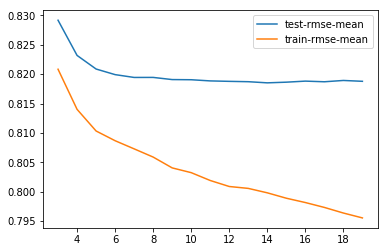

In [14]:
# Modelling
## Adding an Xgboost model
import matplotlib.pyplot as plt
% matplotlib inline

import xgboost as xgb
dtrain = xgb.DMatrix(train, label = train_y)
dtest = xgb.DMatrix(test)

params = {'max_depth' :6 , 'eta' :0.6, "objective" : "reg:linear", "colsample_bytree" : 0.9}
model = xgb.cv(params, dtrain, num_boost_round = 20, early_stopping_rounds = 50) 
model.loc[3:, ['test-rmse-mean', 'train-rmse-mean']].plot()

In [110]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')

iter_no = 5
cv_splits = 10

def treesCV(eta, gamma,max_depth, min_child_weight,subsample,alpha,colsample_bytree):
#function for cross validation gradient boosted trees
    return(-cross_val_score(xgb.XGBRegressor(objective='reg:linear',
                                            tree_method = 'auto',
                                            learning_rate = eta,
                                            gamma=max(gamma,0),
                                            max_depth = int(max_depth),
                                            min_child_weight = int(min_child_weight),                   
                                            colsample_bytree = min(colsample_bytree,1),
                                            n_estimators = 20,alpha = alpha,
                                            subsample = min(subsample,1), 
                                            seed=95), 
                                            X=train, 
                                            y=train_y, 
                                            scoring = 'neg_mean_absolute_error', 
                                            cv=7, n_jobs=-1).mean())

In [114]:
## Bayesian Optimisation

if __name__ == '__main__':    
    treesBO = BayesianOptimization(treesCV,{'eta' : (0.55,0.61),'gamma':(2,5), 'max_depth': (5,7),
                                            'min_child_weight':(0.85,1),
                                            'subsample':(0.8,1),
                                            'alpha': (0, 0.000002),
                                            'colsample_bytree':(0.85,0.95)})
    treesBO.maximize(n_iter=7)
    tree_best = treesBO.res['max']

    
    #train tree with best paras
    model_xgb = xgb.XGBRegressor(objective='reg:linear',
                                    tree_method = 'auto',
                                    seed=95, alpha = tree_best['max_params']['alpha'],
                                    learning_rate=max(tree_best['max_params']['eta'],0),
                                    gamma=max(tree_best['max_params']['gamma'],0),
                                    max_depth=int(tree_best['max_params']['max_depth']),
                                    min_child_weight=int(tree_best['max_params']['min_child_weight']),
                                    silent=True,
                                    subsample=min(tree_best['max_params']['subsample'],1),
                                    colsample_bytree=min(tree_best['max_params']['colsample_bytree'],1),
                                    n_estimators=20,nthread=-1)

Initialization
---------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |       eta |     gamma |   max_depth |   min_child_weight |   subsample | 
    1 | 00m05s |    0.60250 |    0.0000 |             0.9334 |    0.5950 |    3.0208 |      5.6343 |             0.9121 |      0.9830 | 
    2 | 00m07s |    0.59907 |    0.0000 |             0.9059 |    0.6083 |    4.4692 |      6.7651 |             0.9509 |      0.9407 | 
    3 | 00m09s |    0.59899 |    0.0000 |             0.8550 |    0.5679 |    3.8289 |      6.1010 |             0.9813 |      0.8101 | 
    4 | 00m07s |    0.60271 |    0.0000 |             0.8604 |    0.5879 |    2.4940 |      5.6467 |             0.9430 |      0.9733 | 
    5 | 00m20s |    0.59974 |    0.0000 |             0.8826 |    0.6068 |    3.1991 |      6.1950 |             0.8921 |      0.9133 | 
Bayesian Optimization
-----

In [115]:
model_xgb.fit(train, train_y)
pred_xgb = np.expm1(model_xgb.predict(test))
pred = pred_xgb.astype(int)

pd.DataFrame({'ID':ID, 'Upvotes': pred}).to_csv('Upvote_xgb.csv', index=False)

In [116]:
tree_best

{'max_params': {'alpha': 1.195265139675307e-06,
  'colsample_bytree': 0.8717909644795416,
  'eta': 0.5767219071911577,
  'gamma': 4.959903720030352,
  'max_depth': 5.017396493679262,
  'min_child_weight': 0.8704431965035039,
  'subsample': 0.9953333313827262},
 'max_val': 0.603315134394753}